In [3]:
from IPython import InteractiveShell
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot

In [4]:
train_data = pd.read_csv("train.csv").dropna()
train_data.drop_duplicates(subset="tweetText",
                     keep=False, inplace=True)
train_features = train_data['tweetText']
train_label = train_data['label']
test_data = pd.read_csv("test.csv").dropna()
test_data.drop_duplicates(subset="tweetText",
                     keep=False, inplace=True)
test_features = test_data['tweetText']
test_label = test_data['label']

In [5]:
def vectoriser(x,y,z):
    return TfidfVectorizer(
        analyzer='char',
        max_df= z,
        ngram_range=(x,y)
    )

In [12]:
from sklearn.naive_bayes import MultinomialNB
def features(char_vectorizer):
    train_char_features = char_vectorizer.fit_transform(train_features)
    test_char_features = char_vectorizer.transform(test_features)
    le = preprocessing.LabelEncoder()
    train_label_encoded = le.fit_transform(train_label)
    test_label_encoded = le.transform(test_label)
    mnb = MultinomialNB()
    mnb.fit(train_char_features , train_label_encoded)
    y_pred = mnb.predict(test_char_features)
    print(f1_score(y_pred,test_label_encoded,average='binary',pos_label=0))

In [7]:
for x in np.arange(1,10,1):
        for y in np.arange(x,10,1):
            print('(' + str(x) + ',' + str(y) +')')
            features(vectoriser(x,y,0.8))

(1,1)
0.8247027234369007
(1,2)
0.7837837837837838
(1,3)
0.8043390920048212
(1,4)
0.8370313695485846
(1,5)
0.8377042949448879
(1,6)
0.8364326375711575
(1,7)
0.8364326375711575
(1,8)
0.8364326375711575
(1,9)
0.8364326375711575
(2,2)
0.7852028639618139
(2,3)
0.8053311793214862
(2,4)
0.8377445339470656
(2,5)
0.8386605783866058
(2,6)
0.8370679832890239
(2,7)
0.8364326375711575
(2,8)
0.8364326375711575
(2,9)
0.8364326375711575
(3,3)
0.8395164651938308
(3,4)
0.8705882352941177
(3,5)
0.8732618196265395
(3,6)
0.8649921507064364
(3,7)
0.8569206842923794
(3,8)
0.8447681103871214
(3,9)
0.8396190476190477
(4,4)
0.8710341985990935
(4,5)
0.8798701298701298
(4,6)
0.8801936264622832
(4,7)
0.8799678843837816
(4,8)
0.8794553464156988
(4,9)
0.875598086124402
(5,5)
0.8801955990220047
(5,6)
0.8788983394086675
(5,7)
0.8799029518803074
(5,8)
0.8810963321241435
(5,9)
0.8796780684104629
(6,6)
0.8766788766788767
(6,7)
0.8747967479674796
(6,8)
0.8755052546483427
(6,9)
0.8767123287671234
(7,7)
0.8719611021069691
(

In [8]:
for x in np.arange(0.1,1,0.1):
    print(x)
    features(vectoriser(4,7,x))

0.1
0.8800641797031689
0.2
0.8800641797031689
0.30000000000000004
0.8796147672552167
0.4
0.8804173354735152
0.5
0.8799678843837816
0.6
0.8799678843837816
0.7000000000000001
0.8799678843837816
0.8
0.8799678843837816
0.9
0.8799678843837816


In [13]:
features(vectoriser(4,7,0.2))

0.8800641797031689


In [10]:
from sklearn.svm import LinearSVC
def features(char_vectorizer):
    train_char_features = char_vectorizer.fit_transform(train_features)
    test_char_features = char_vectorizer.transform(test_features)
    le = preprocessing.LabelEncoder()
    train_label_encoded = le.fit_transform(train_label)
    test_label_encoded = le.transform(test_label)
    mnb = LinearSVC()
    mnb.fit(train_char_features , train_label_encoded)
    y_pred = mnb.predict(test_char_features)
    print(f1_score(y_pred,test_label_encoded,average='binary',pos_label=0))

In [11]:
features(vectoriser(4,7,0.2))

0.8087188612099645


<Figure size 2000x1000 with 0 Axes>

(-0.5, 1599.5, 799.5, -0.5)

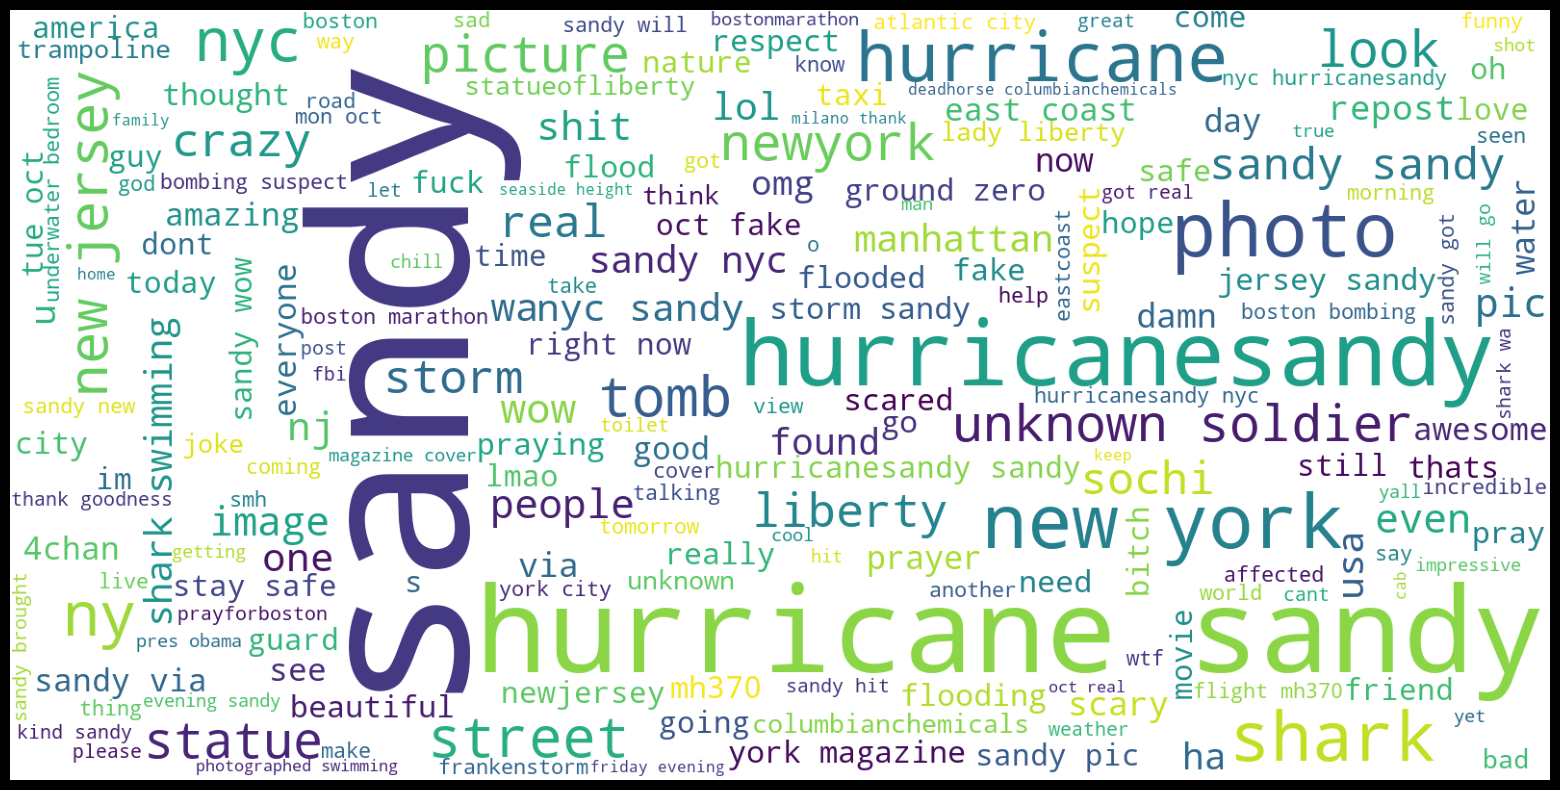

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(train_features.tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

<Figure size 2000x1000 with 0 Axes>

(-0.5, 1599.5, 799.5, -0.5)

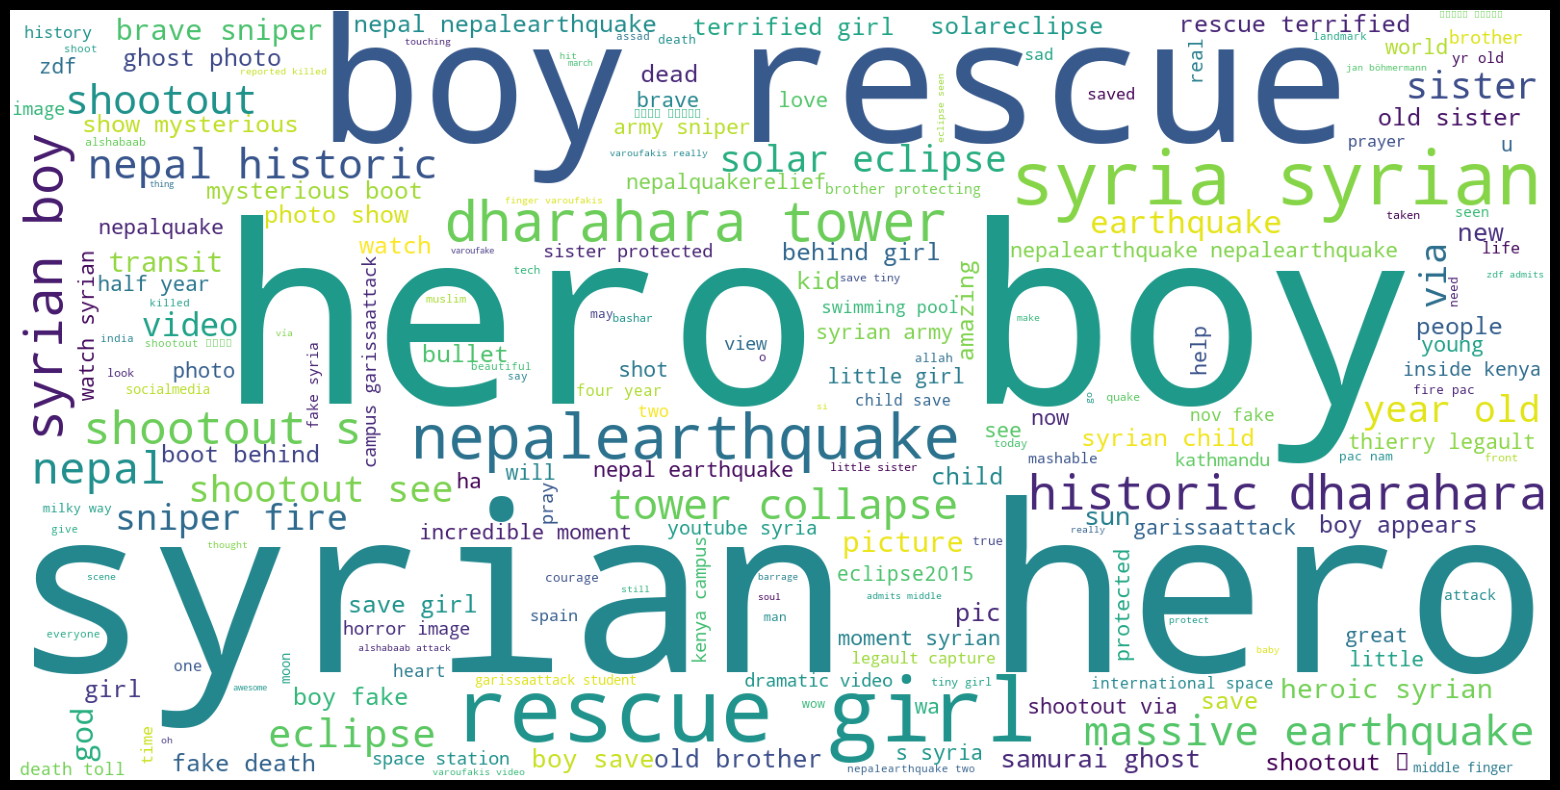

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(test_features.tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

In [16]:
train_data.tweetText.iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Text Distribution')

AttributeError: 'Series' object has no attribute 'iplot'

(array([6976.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2962.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

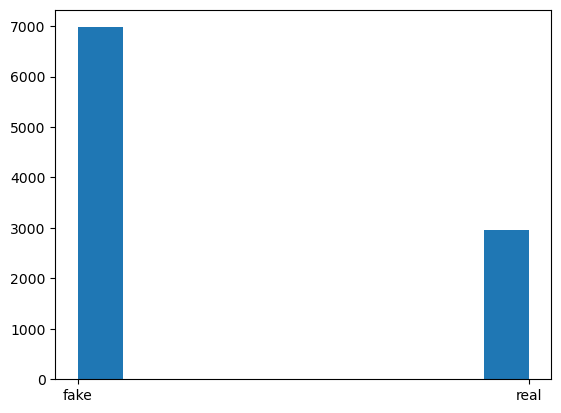

(array([1102.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         431.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

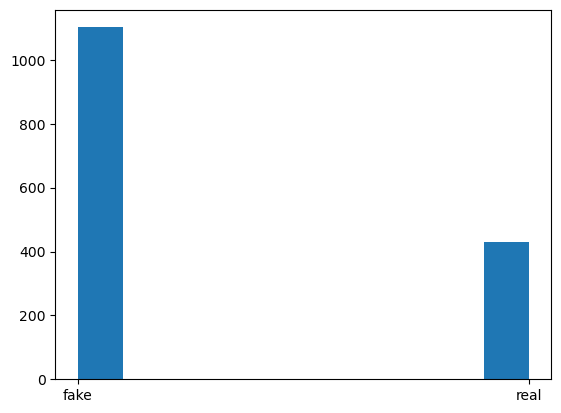

In [17]:
import matplotlib.pyplot as plt
plt.hist(train_label)
plt.show()
plt.hist(test_label)
plt.show()

C:\Users\tosin\AppData\Local\Temp\ipykernel_29956\3133254977.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



(array([  0.,  31., 156., 300., 454., 574., 601., 581., 577., 605., 556.,
        536., 560., 559., 557., 519., 500., 451., 464., 523., 402., 224.,
        128.,  37.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120]),
 <BarContainer object of 24 artists>)

C:\Users\tosin\AppData\Local\Temp\ipykernel_29956\3133254977.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



(array([  0.,  31., 156., 300., 454., 574., 601., 581., 577., 605., 556.,
        536., 560., 559., 557., 519., 500., 451., 464., 523., 402., 224.,
        128.,  37.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120]),
 <BarContainer object of 24 artists>)

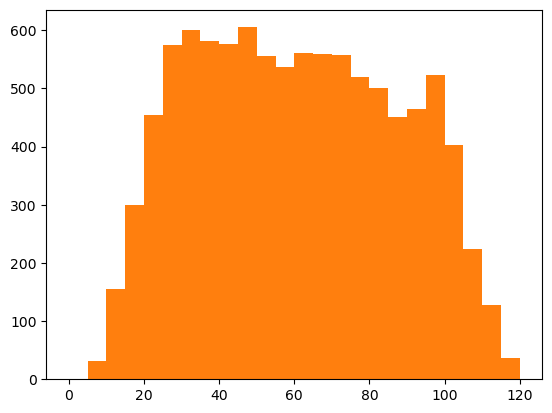

In [18]:
train_data.text_length = train_data.tweetText.str.len()
plt.hist(train_data.text_length, bins=np.arange(0,125,5))
test_data.text_length = train_data.tweetText.str.len()
plt.hist(test_data.text_length, bins=np.arange(0,125,5))

In [19]:
from nltk import word_tokenize
train_data['tokens'] = train_data.tweetText.apply(lambda x : word_tokenize(x))
test_data['tokens'] = test_data.tweetText.apply(lambda x : word_tokenize(x))
train_tokens = np.concatenate(train_data.tokens.tolist())
test_tokens = np.concatenate(test_data.tokens.tolist())

In [ ]:
train_tokens = pd.Series(' '.join(train_data.tweetText).split()).value_counts()
test_tokens = pd.Series(' '.join(test_data.tweetText).split()).value_counts()

In [ ]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
from chart_studio import plotly
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train_data.tweetText, 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['tweetText' , 'count'])
df1.groupby('tweetText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train_data.tweetText, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

In [ ]:
x1 = train_data.loc[train_data.label == 'real', 'label']
x0 = train_data.loc[train_data.label == 'fake', 'label']

trace1 = go.Histogram(
    x=x0, name='real',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'fake',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of reviews based on Recommendation')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

In [ ]:
!pip install -U kaleido